#### Importing packages

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.dates as md
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import gmplot

/Users/leilasapple/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/leilasapple/.matplotlib/matplotlibrc", line #621
  (fname, cnt))


#### Reading data files.
this file has generated from processing code

In [3]:
#If we need to upload data from the file.
output_data_path='/Users/leilasapple/Documents/Springboard/recruit-restaurant-visitor-forecasting/output_files/'
df=pd.read_csv(os.path.join(output_data_path,'df.csv'))
print(df.describe())

       reserve_visitors       latitude      longitude        holiday  \
count     963686.000000  963686.000000  963686.000000  963686.000000   
mean           5.253537      35.901246     137.469843       0.070904   
std            5.810087       2.349505       3.354441       0.256664   
min            1.000000      33.211967     130.339313       0.000000   
25%            2.000000      34.692109     135.483426       0.000000   
50%            3.000000      35.646745     139.373870       0.000000   
75%            6.000000      35.704527     139.737998       0.000000   
max          100.000000      44.020632     144.273398       1.000000   

       time_difference  visit_dayofweek     visit_year    visit_month  \
count    963686.000000    963686.000000  963686.000000  963686.000000   
mean        176.363289         3.529762    2016.365232       5.917852   
std         276.287772         1.765237       0.481495       3.914088   
min           0.000000         0.000000    2016.000000     

In [3]:
#to check how many restaurants had a maximum reservations
str(df.reserve_visitors.tolist().count(max(df.reserve_visitors)))

'68'

##### To check distribution of visitors in every reservation
most of reservation were for couples (two person)
there weere 68 reservation of about 100 people. 

In [4]:
fig=plt.figure(figsize=(20, 15)) # create a figure object
print('the number of reservation with 100 people:',
      df.reserve_visitors.tolist().count(max(df.reserve_visitors)))

plt.subplot(2, 1, 1)
ax1=sns.countplot( x=df['reserve_visitors'], color='#BF3EFF');
ax1.annotate('68',
            xy=(99, 70), xycoords='data',
            xytext=(80, 50000), 
            textcoords='data',
            size=20,
            arrowprops=dict(arrowstyle="fancy",
                            connectionstyle="arc3"),
            )
plt.xlabel('People')
plt.ylabel('Count')
plt.title('The distribution of the number of people in reservation')

plt.subplot(2, 1, 2)
ax2=sns.countplot( x=df.reserve_visitors[df.reserve_visitors<30], color='#BF3EFF');
ax2.annotate(max(df['reserve_visitors'].value_counts()).astype(str),
            xy=(2, max(df['reserve_visitors'].value_counts())), xycoords='data',
            xytext=(5, max(df['reserve_visitors'].value_counts())), textcoords='data',
            size=20,
            arrowprops=dict(arrowstyle="fancy",
                            connectionstyle="arc3"),
            )
plt.xlabel('People')
plt.ylabel('Count')
plt.title('The distribution of the number of people in reservation')
plt.show()
fig.savefig(os.path.join(output_data_path,'Visitor_hist.png'))   # save the figure to file
plt.close(fig)    # close the figure

the number of reservation with 100 people: 68


##### To check how day of the month varies with custome. 
the begining of the month has slightly less reservation

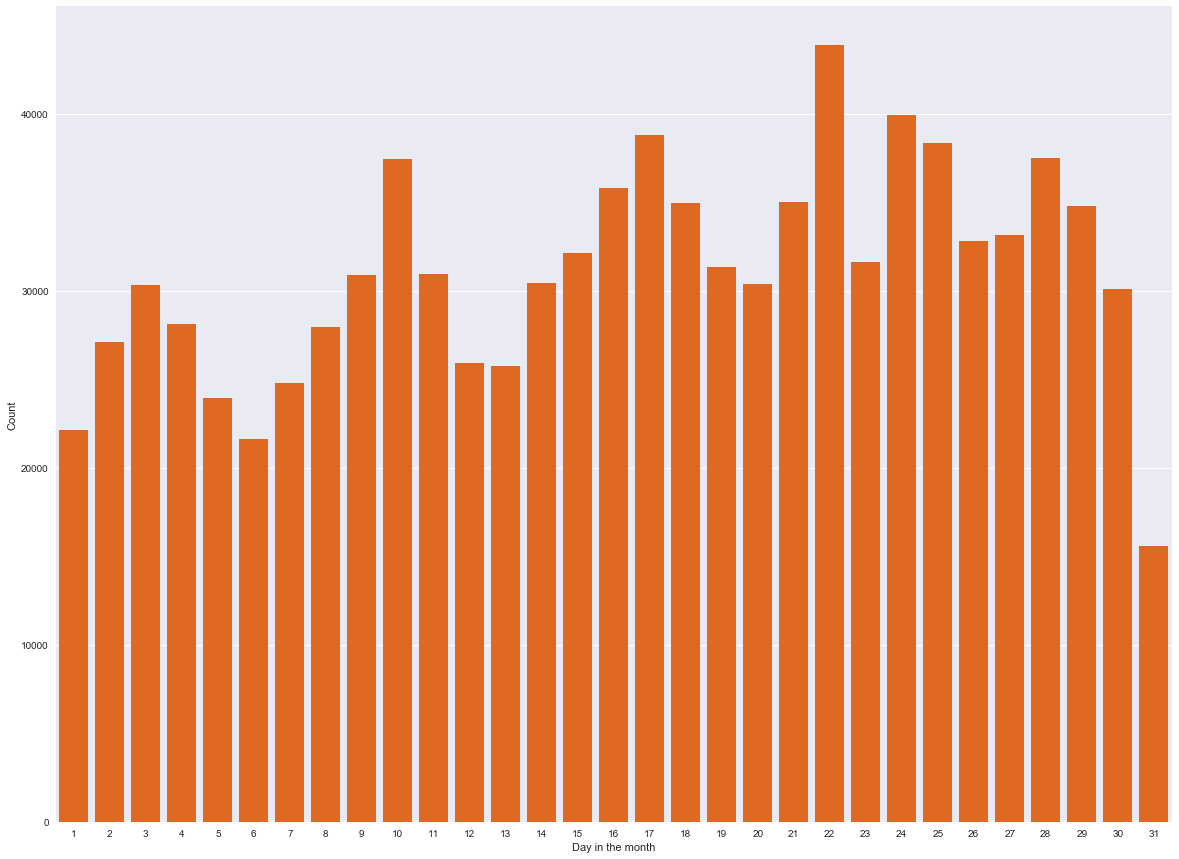

In [4]:
fig=plt.figure(figsize=(20, 15))
#plt.hist(df.visit_day,bins=62,alpha=1)
sns.countplot( x=df['visit_day'], color='#FF6103');

plt.xlabel('Day in the month')
plt.ylabel('Count')
plt.show()
fig.savefig(os.path.join(output_data_path,'Visit_day_hist.png'))   # save the figure to file
plt.close(fig)    # close the figure

##### to check how reservation changes with month of the year 
In the winter and spring people intend to eat more in the resturaunts

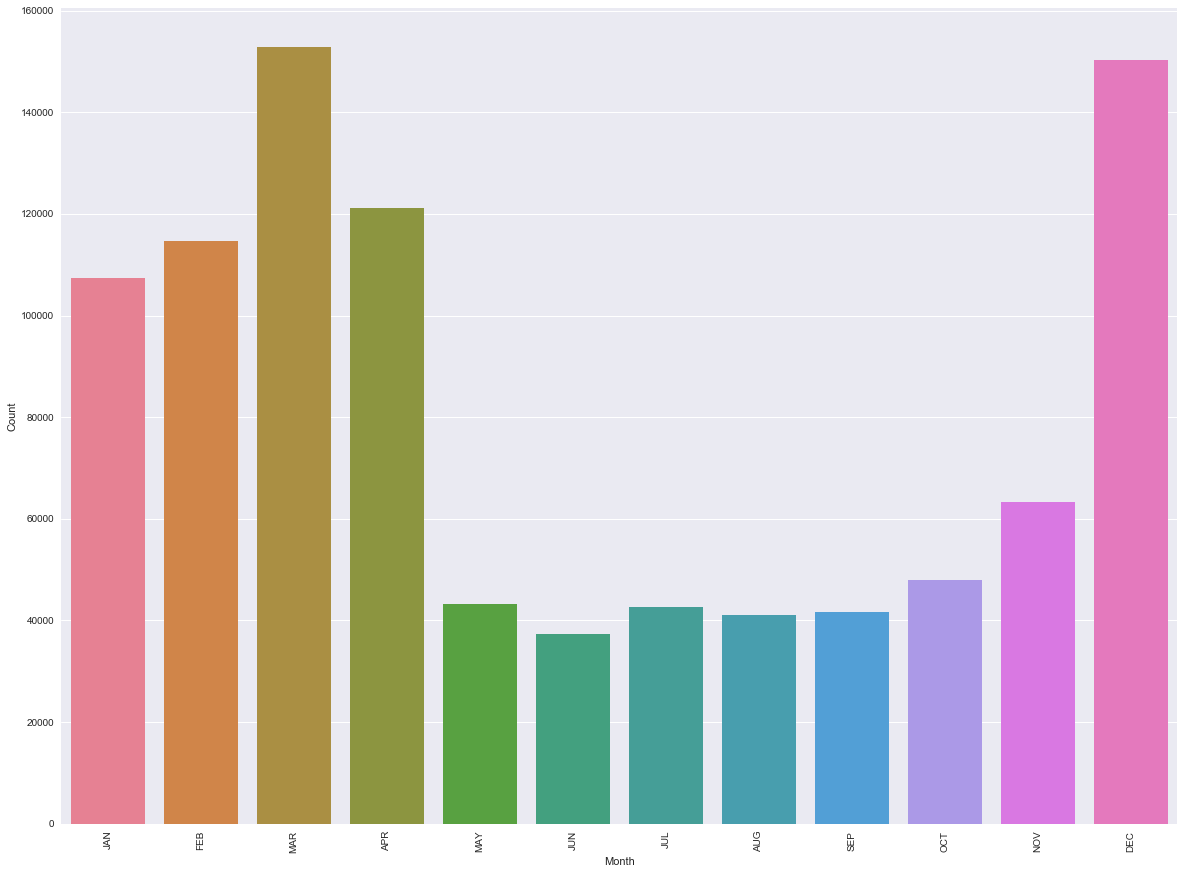

In [6]:
fig=plt.figure(figsize=(20, 15))
#ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
labels = ['JAN', 'FEB', 'MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
ax=sns.countplot( x=df['visit_month'], palette=sns.color_palette("husl", 12));
ax.set_xticklabels(labels,rotation=90)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()
fig.savefig(os.path.join(output_data_path,'Visit_month_hist.png'))   # save the figure to file
plt.close(fig)    # close the figure

In [7]:
print('there is only ', len(df.loc[df.loc[:,'visit_month']==7,'visit_datetime']),' in July' )
print('there is only ', len(df.loc[df.loc[:,'visit_month']==8,'visit_datetime']),' in August' )
print('there is only ', len(df.loc[df.loc[:,'visit_month']==9,'visit_datetime']),' in September' )
print('there is only ', len(df.loc[df.loc[:,'visit_month']==10,'visit_datetime']),' in October' )

there is only  42634  in July
there is only  41039  in August
there is only  41671  in September
there is only  47951  in October


##### To check how people eat in resturants over the week
people go to resturants in friday and saterday more often

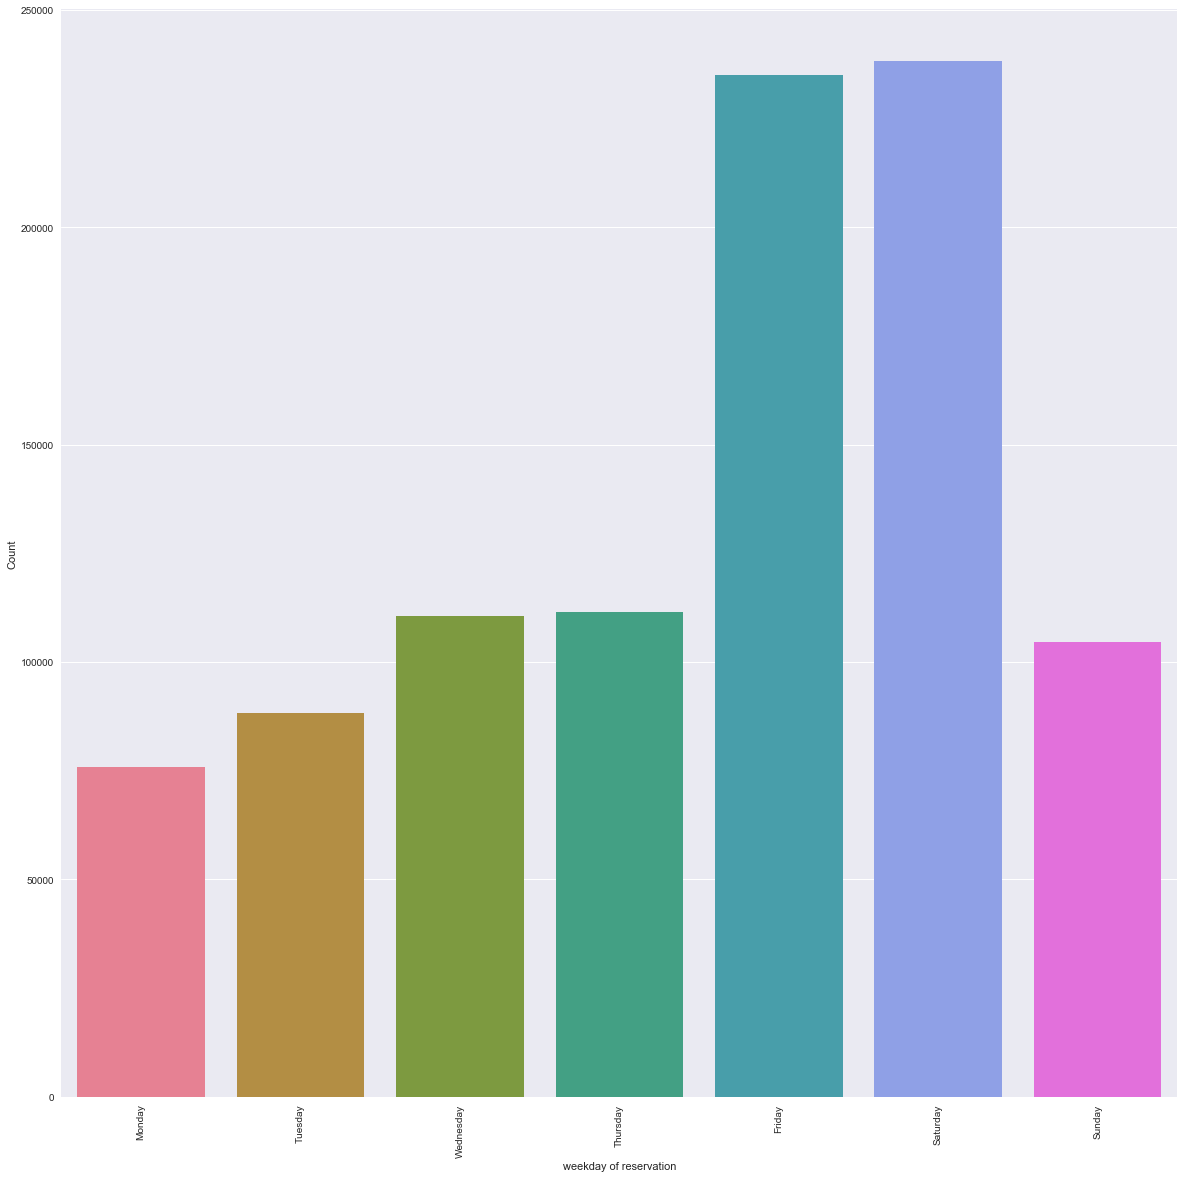

In [4]:
fig = plt.figure(figsize=(20,20))  
ax=sns.countplot( x=df['visit_dayofweek'], palette=sns.color_palette("husl", 7));
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=90)
plt.xlabel('weekday of reservation')
plt.ylabel('Count')
plt.show()
fig.savefig(os.path.join(output_data_path,'Weekday_hist.png'))   # save the figure to file
plt.close(fig)    # close the figure

##### To check when people go to resturant more
people like to go to resturants between 6-7 pm 

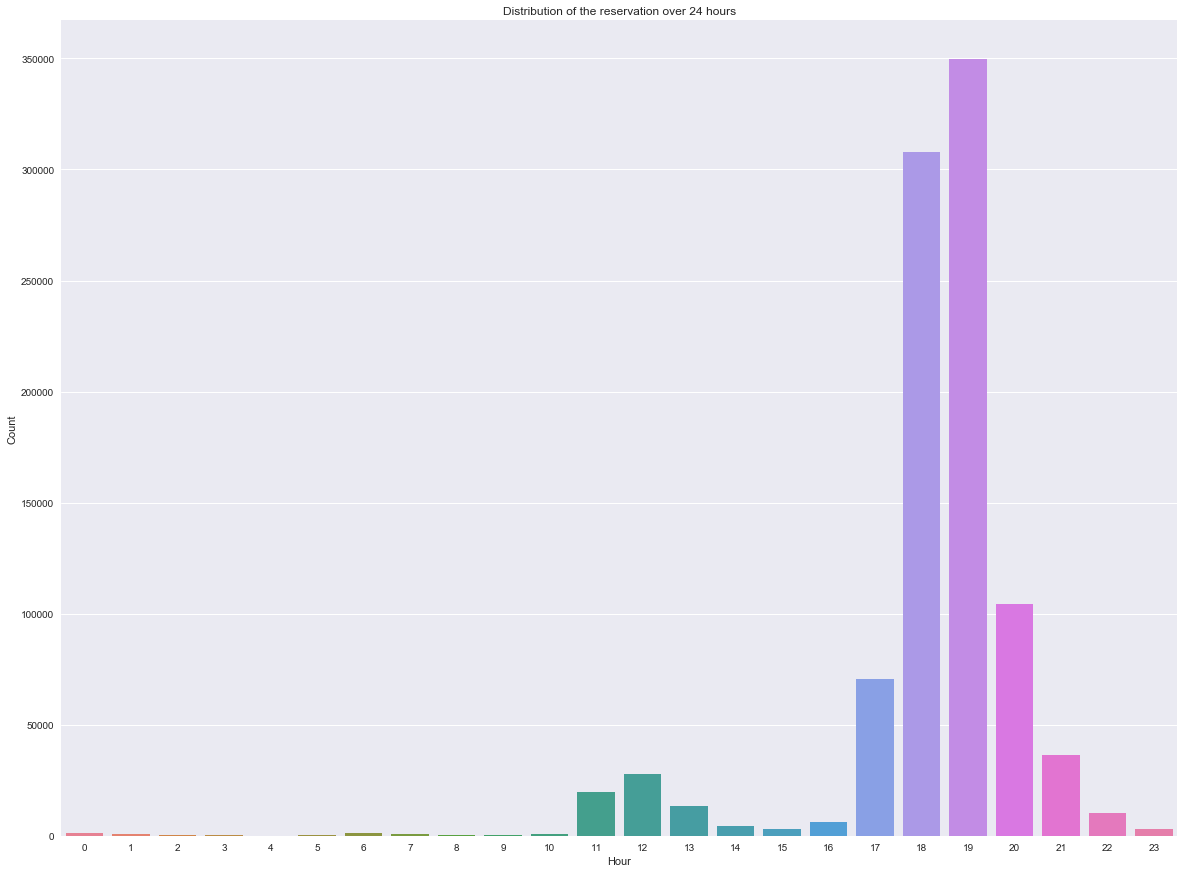

In [9]:
fig = plt.figure(figsize=(20, 15))  # create a figure object
ax=sns.countplot(x='visit_hour',data=df, palette=sns.color_palette("husl", 24));
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Distribution of the reservation over 24 hours')
plt.show()
fig.savefig(os.path.join(output_data_path,'Visiting_hour.png'))   # save the figure to file
plt.close(fig)

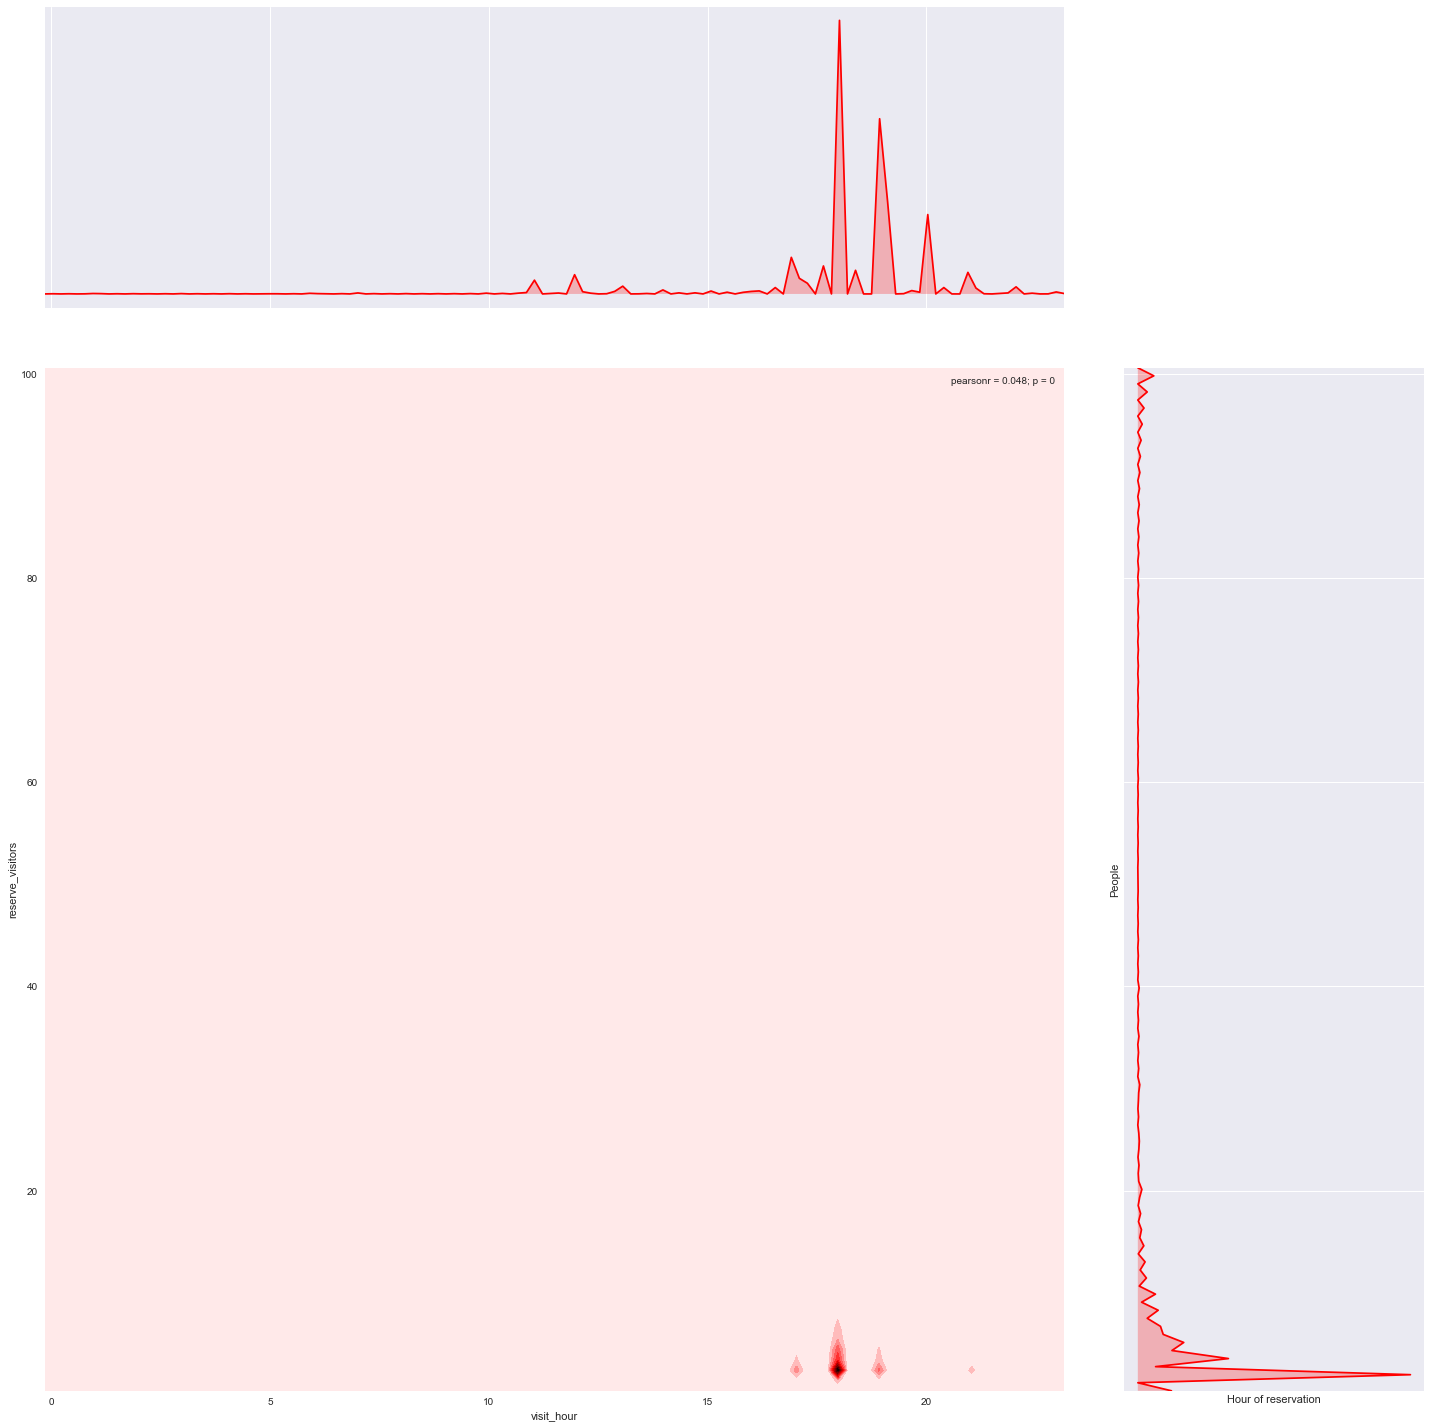

In [10]:
fig = plt.figure(figsize=(20, 15))  # create a figure object
ax1=sns.jointplot(x='visit_hour',
                  y='reserve_visitors',
                  data=df,
                  kind="kde",
                  size=20, ratio=3,
                  color='red'
                 )
plt.xlabel('Hour of reservation')
plt.ylabel('People')
plt.show()
fig.savefig(os.path.join(output_data_path,'Visitor_Hour.png'))   # save the figure to file
plt.close(fig)    # close the figure

##### To check possible relationship between features

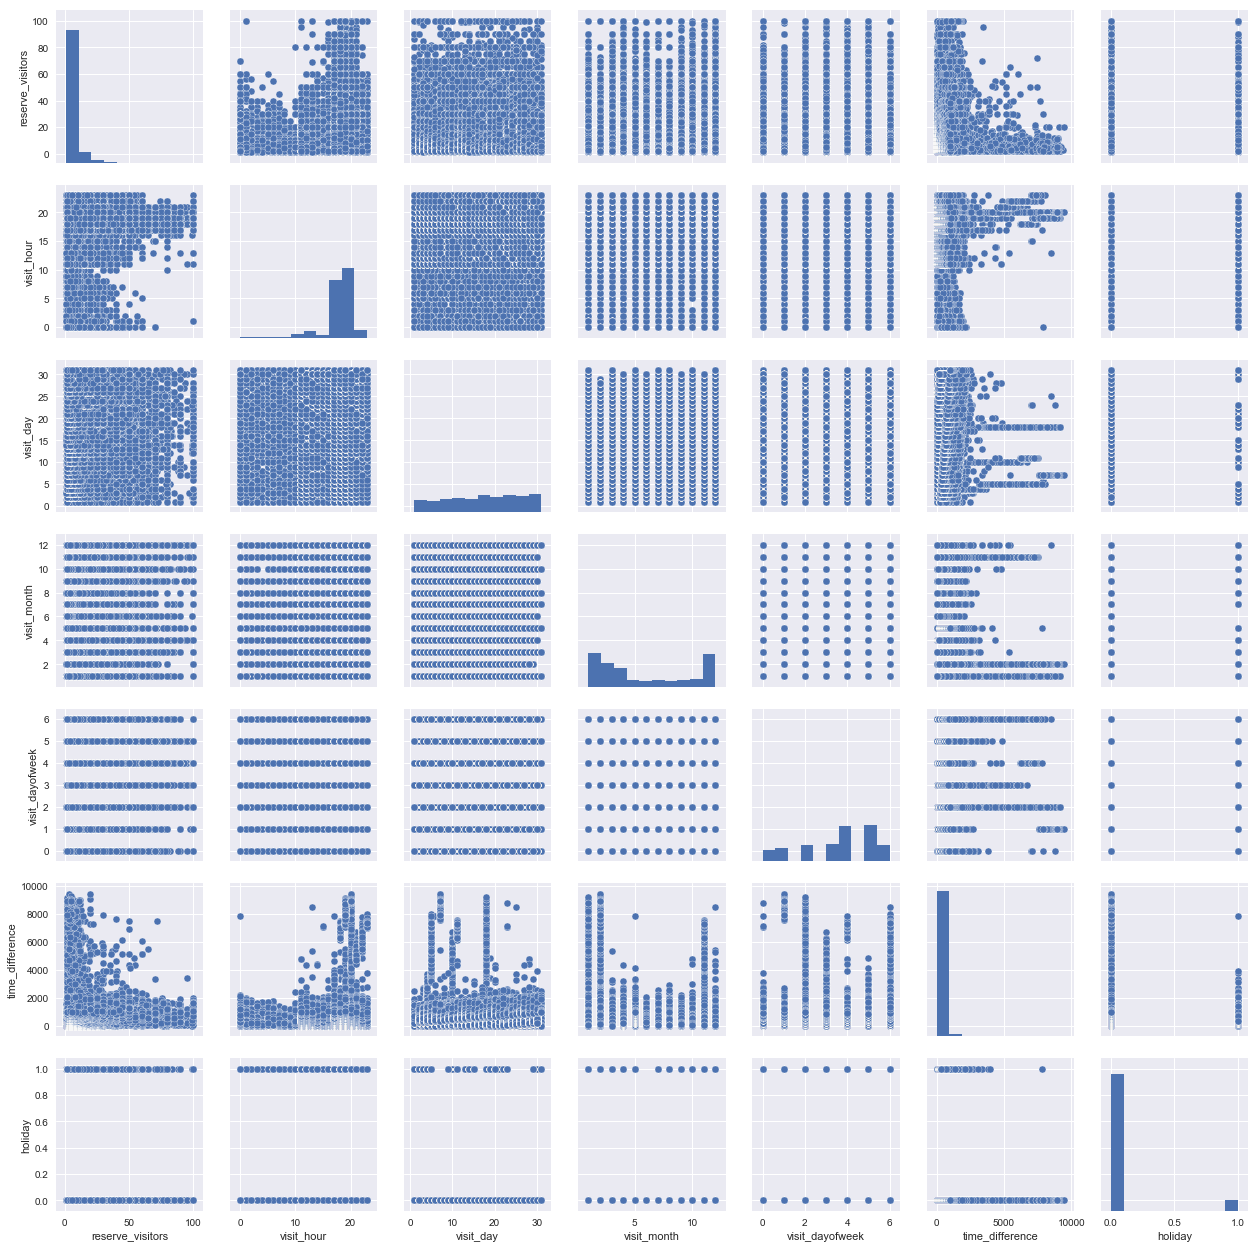

In [11]:
fig = plt.figure(figsize=(20, 20))  # create a figure object
sns.pairplot(df[['reserve_visitors','visit_hour','visit_day','visit_month',
                 'visit_dayofweek','time_difference','holiday']],
            palette="husl")
plt.show()
fig.savefig(os.path.join(output_data_path,'Pairwise_relationships_data.png'))   # save the figure to file
plt.close(fig)

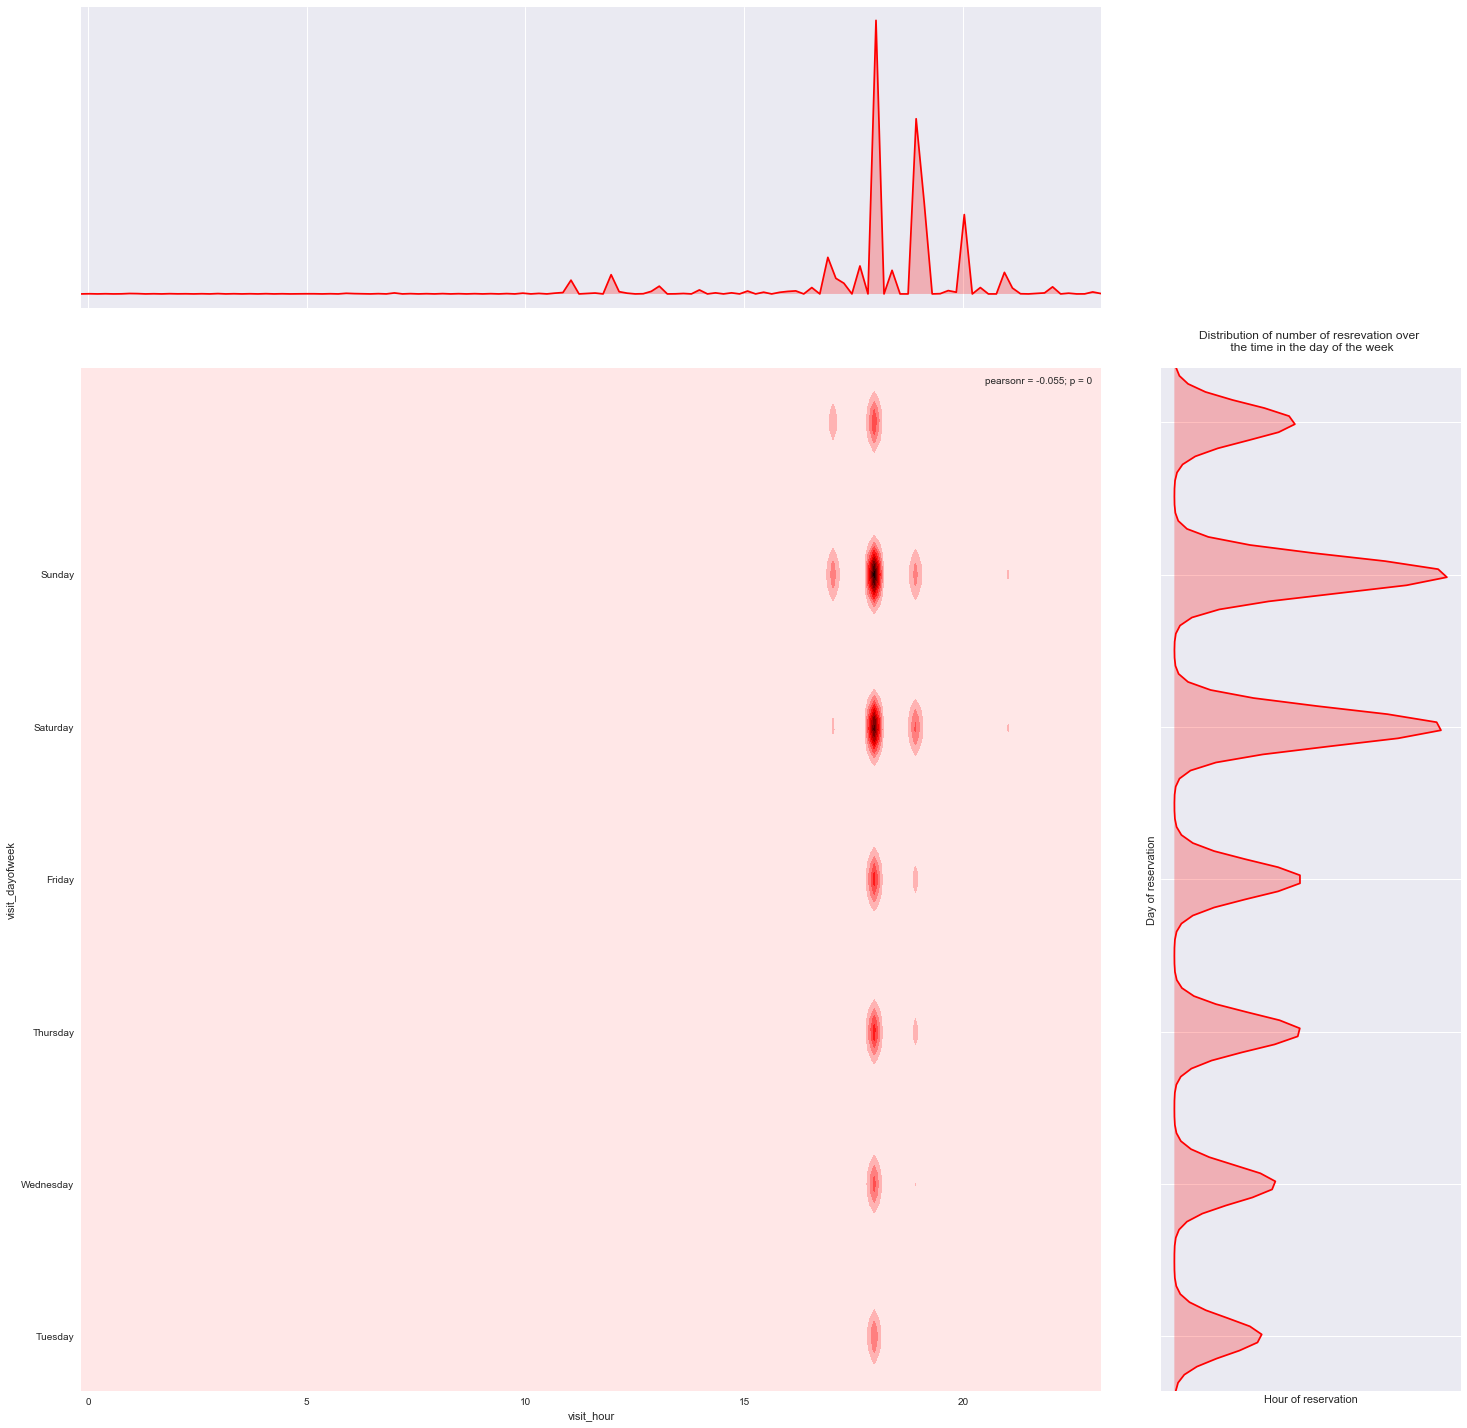

In [12]:
fig = plt.figure(figsize=(15, 15))  # create a figure object
ax=sns.jointplot(x='visit_hour',
               y='visit_dayofweek',
               data=df,
               kind="kde",
               size=20, ratio=3,
               color='red')
#ax =plt.hist2d(df.visit_hour, df.visit_weekday, bins=(25,7))
ax.ax_joint.set_yticklabels(['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=0)
#plt.xticks(range(25))
#ax.set_xticklabels(range(25),rotation=90)

plt.xlabel('Hour of reservation')
plt.ylabel('Day of reservation')
plt.title('Distribution of number of resrevation over \n the time in the day of the week\n')
plt.show()
fig.savefig(os.path.join(output_data_path,'Weekday_hour_hist.png'))   # save the figure to file
plt.close(fig)    # close the figure

In [13]:
lat_avg=df.latitude.mean()
long_avg=df.longitude.mean()
print(lat_avg,long_avg)
df.longitude.min(), df.longitude.max()

35.90124552382018 137.46984277229234


(130.339313030944, 144.2733983)

##### to check the location of resturants 
It appeared that there are too many resturants so that their location can not be uploaded from google map and it time overs. 

In [14]:
gmap = gmplot.GoogleMapPlotter(lat_avg,long_avg,5)
gmap.scatter(df.latitude.values, df.longitude.values, 'black', size=70, marker=True)
gmap.draw(os.path.join(output_data_path,'Japan_map.html'))

In [15]:
gmap = gmplot.GoogleMapPlotter(35.6833,139.6833,11)
gmap.scatter(df.latitude[0:20000].values, df.longitude[0:20000].values, 'red', size=20, marker=True)
gmap.draw(os.path.join(output_data_path,'Tokyo_map.html'))

##### To check the duration between resevation and visits
It may give us an indication how busy and popular every resturant is

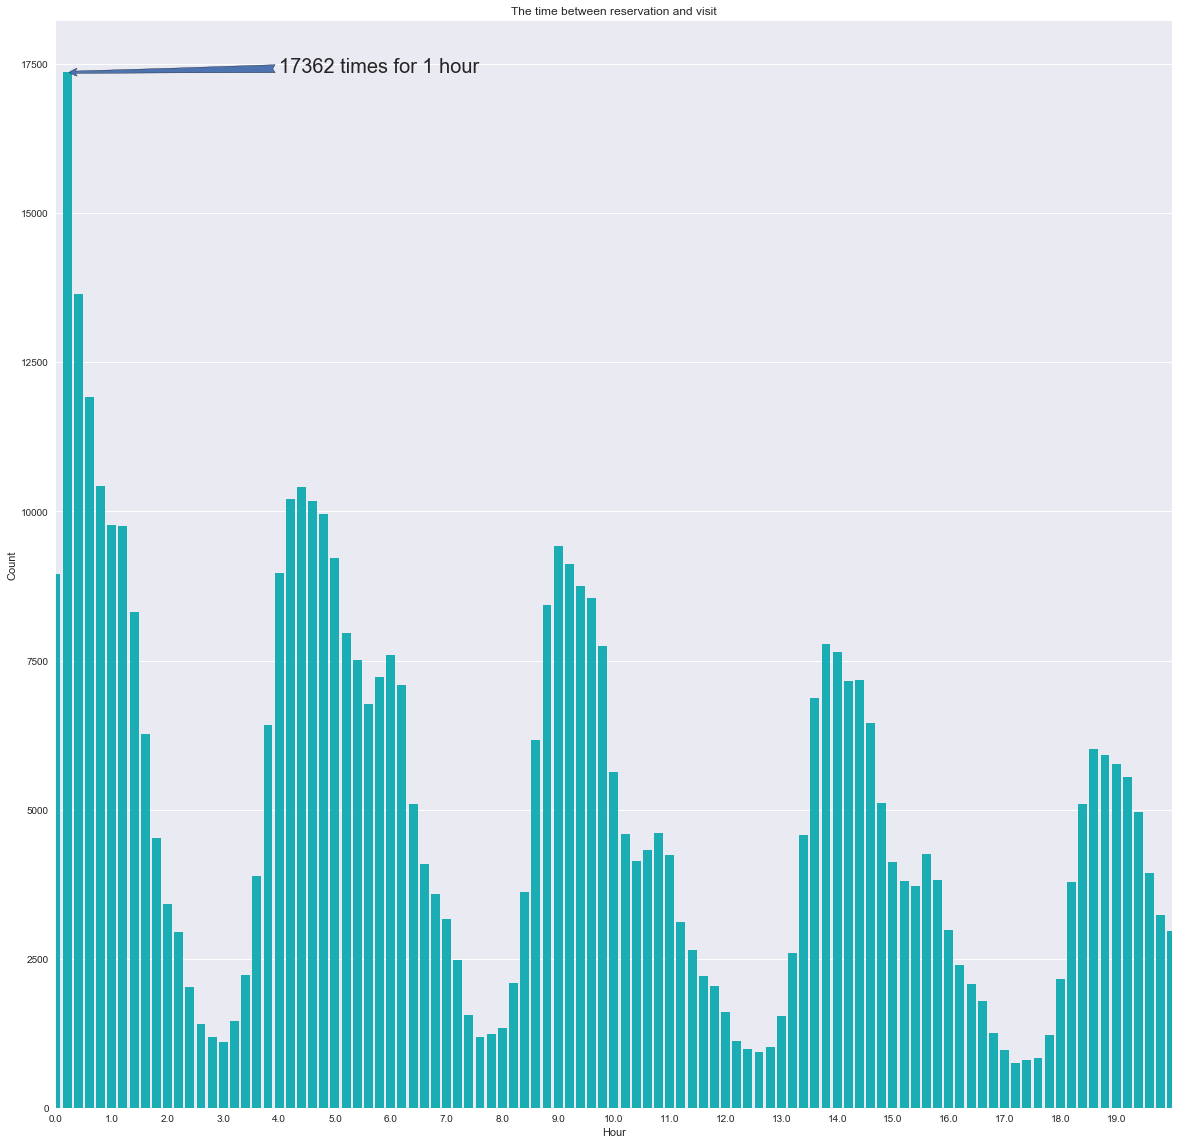

In [16]:
fig = plt.figure(figsize=(20, 20))  # create a figure object
ax=sns.countplot(x=df['time_difference'], color='#00C5CD');
ax.annotate(max(df['time_difference'].value_counts()).astype(str)+' times for 1 hour',
            xy=(1, max(df['time_difference'].value_counts())), xycoords='data',
            xytext=(20, max(df['time_difference'].value_counts())), textcoords='data',
            size=20,
            arrowprops=dict(arrowstyle="fancy",
                            connectionstyle="arc3"),
            )
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('The time between reservation and visit')
plt.xlim(0,100)
#ax.set_xticks(np.arange(0,max(df.time_difference),5))
ax.set_xticks(np.arange(0,100,5))

plt.show()
fig.savefig(os.path.join(output_data_path,'Time_difference_hist.png'))   # save the figure to file
plt.close(fig)    # close the figure

In [4]:
data=pd.read_csv(os.path.join(output_data_path,'data1.csv'))


In [5]:
data.describe()

,visitor,holiday,dt,day,month,area_index,genre_index,genre_area_index,holiday_index,store_holiday_index,month_index,store_month_index,day_index,day_month_index,holiday_day_month_index,store_day_month_index,store_index,store_day_index
count,587957.000000,587957.000000,587957.000000,587957.000000,587957.000000,587957.000000,587957.000000,587957.000000,587957.000000,587957.000000,587957.000000,587957.000000,587957.000000,587957.000000,587957.000000,405067.000000,587957.000000,587957.000000
mean,8.610766,0.064949,167.435631,3.361385,5.728307,8.610766,8.610766,8.610766,8.610766,8.610766,8.610766,8.610766,8.610766,8.610766,8.610766,8.786907,8.610766,8.610766
std,10.973159,0.246435,190.366523,1.836051,3.728686,1.920509,1.995890,2.719699,0.108896,3.894509,1.919525,5.243407,1.236848,2.414067,2.526704,8.612718,3.782199,4.862297
min,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.750000,1.000000,8.197580,1.000000,6.519916,1.000000,7.019212,5.775318,4.076923,1.000000,1.000000,1.000000
25%,3.000000,0.000000,46.000000,2.000000,3.000000,7.733216,7.584022,7.183119,8.639466,6.263158,7.237220,5.470588,7.340787,6.885790,6.851483,4.000000,6.312102,5.631579
50%,5.000000,0.000000,107.000000,4.000000,4.000000,8.117849,8.466476,8.347153,8.639466,7.840909,8.033303,7.347826,8.514701,8.073888,8.073888,6.600000,7.889796,7.600000
75%,10.000000,0.000000,219.500000,5.000000,9.000000,9.097408,9.166679,9.584897,8.639466,9.868966,9.538045,10.194444,9.219715,9.051066,9.119085,10.750000,9.813953,10.285714
max,2241.000000,1.000000,8429.284314,6.000000,12.000000,26.790698,52.000000,52.000000,8.639466,100.000000,13.399186,511.000000,10.457347,16.763521,19.537010,2241.000000,95.820000,347.125000


In [28]:
data.head()


,id,store_id,genre,visitor,area,holiday,dt,day,month,area_index,...,holiday_index,store_holiday_index,month_index,store_month_index,day_index,day_month_index,holiday_day_month_index,store_day_month_index,store_index,store_day_index
0,air_877f79706adbfb06_2016-01-01,air_877f79706adbfb06,Japanese food,3,Tōkyō-to Minato-ku Shibakōen,1.0,3.5,4,1,8.002254,...,8.19758,10.933333,8.033303,10.350000,10.457347,9.537068,4.076923,9.875000,10.853282,12.617021
1,air_db4b38ebe7a7ceff_2016-01-01,air_db4b38ebe7a7ceff,Dining bar,9,Ōsaka-fu Ōsaka-shi Shinmachi,1.0,0.0,4,1,12.867168,...,8.19758,10.187500,8.033303,8.833333,10.457347,9.537068,4.076923,8.875000,9.335907,8.979592
2,air_db80363d35f10926_2016-01-01,air_db80363d35f10926,Dining bar,9,Hokkaidō Asahikawa-shi 6 Jōdōri,1.0,11.5,4,1,18.755948,...,8.19758,27.500000,8.033303,23.521739,10.457347,9.537068,4.076923,27.888889,25.089655,29.283333
3,air_db80363d35f10926_2016-01-02,air_db80363d35f10926,Dining bar,36,Hokkaidō Asahikawa-shi 6 Jōdōri,1.0,7.3,5,1,18.755948,...,8.19758,27.500000,8.033303,23.521739,9.219715,9.051066,5.731959,40.222222,25.089655,42.285714
4,air_3bb99a1fe0583897_2016-01-02,air_3bb99a1fe0583897,Izakaya,4,Miyagi-ken Sendai-shi Kamisugi,1.0,11.0,5,1,22.694784,...,8.19758,19.866667,8.033303,24.204082,9.219715,9.051066,5.731959,26.375000,26.915441,32.116279


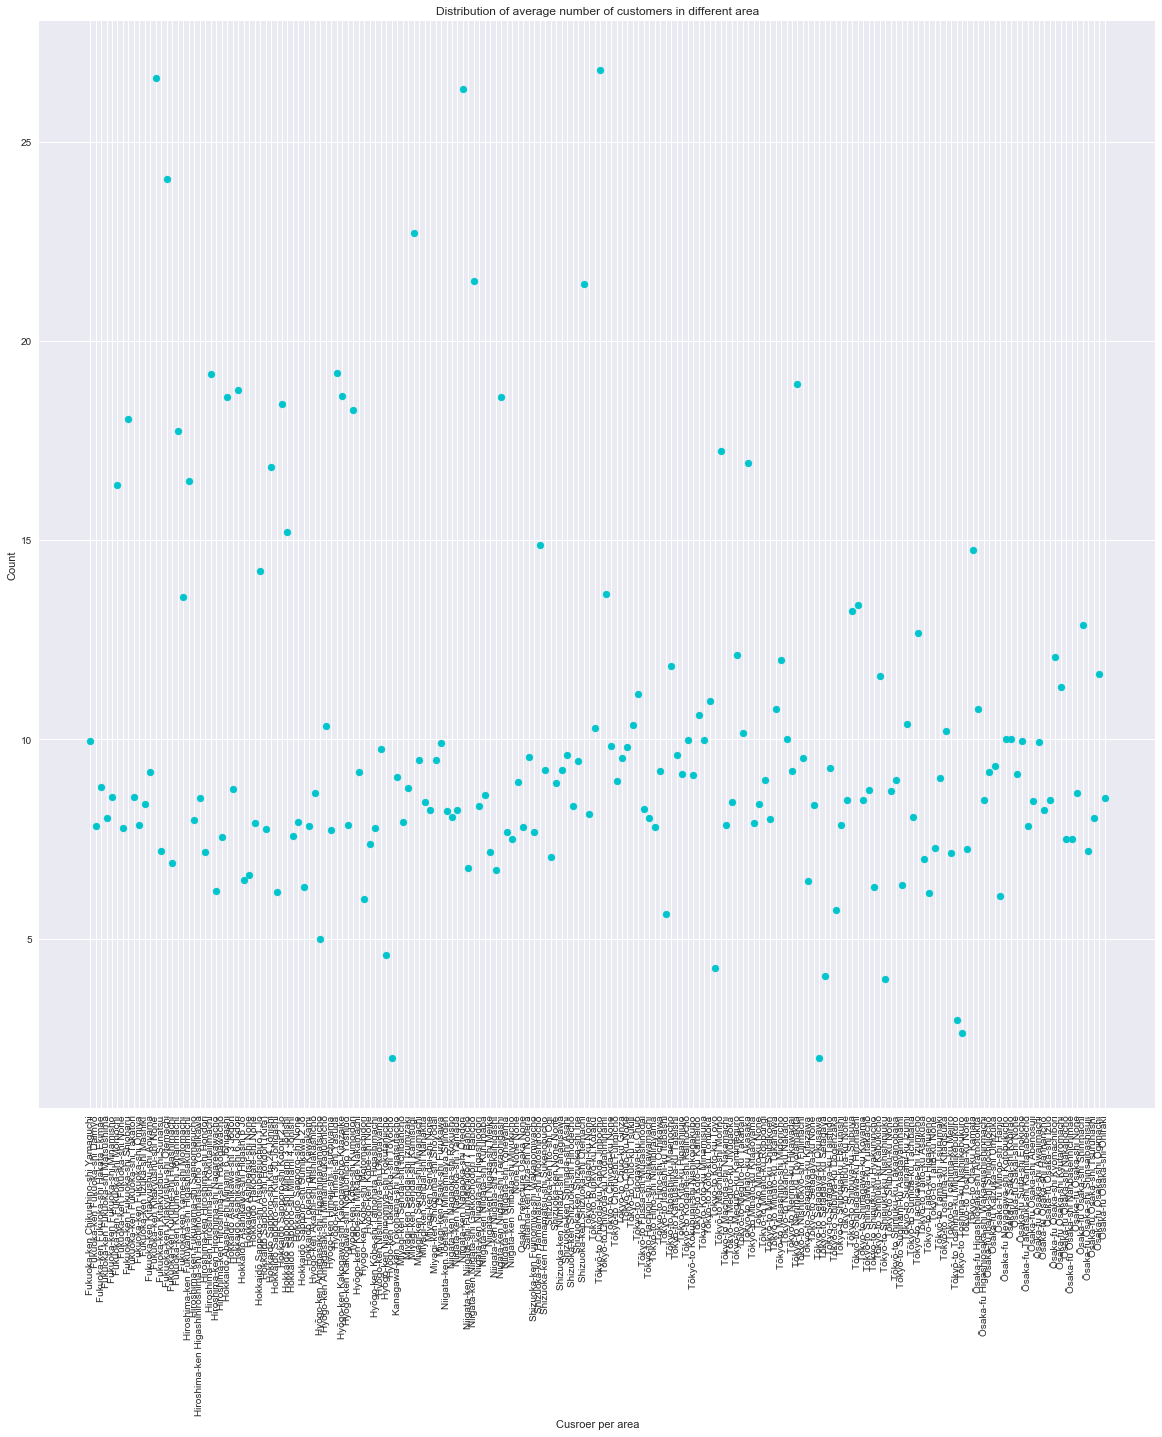

In [51]:
fig = plt.figure(figsize=(20, 20))  # create a figure object
u, indices = np.unique(data['area'], return_index=True)
ax=plt.scatter(x=u,y=data.loc[indices,'area_index'], color='#00C5CD')
plt.xlabel('Cusroer per area')
plt.ylabel('Count')
plt.title('Distribution of average number of customers in different area')
plt.xticks(rotation=90)
plt.show()
fig.savefig(os.path.join(output_data_path,'Customer_area.png'))   # save the figure to file
plt.close(fig)    # close the figure

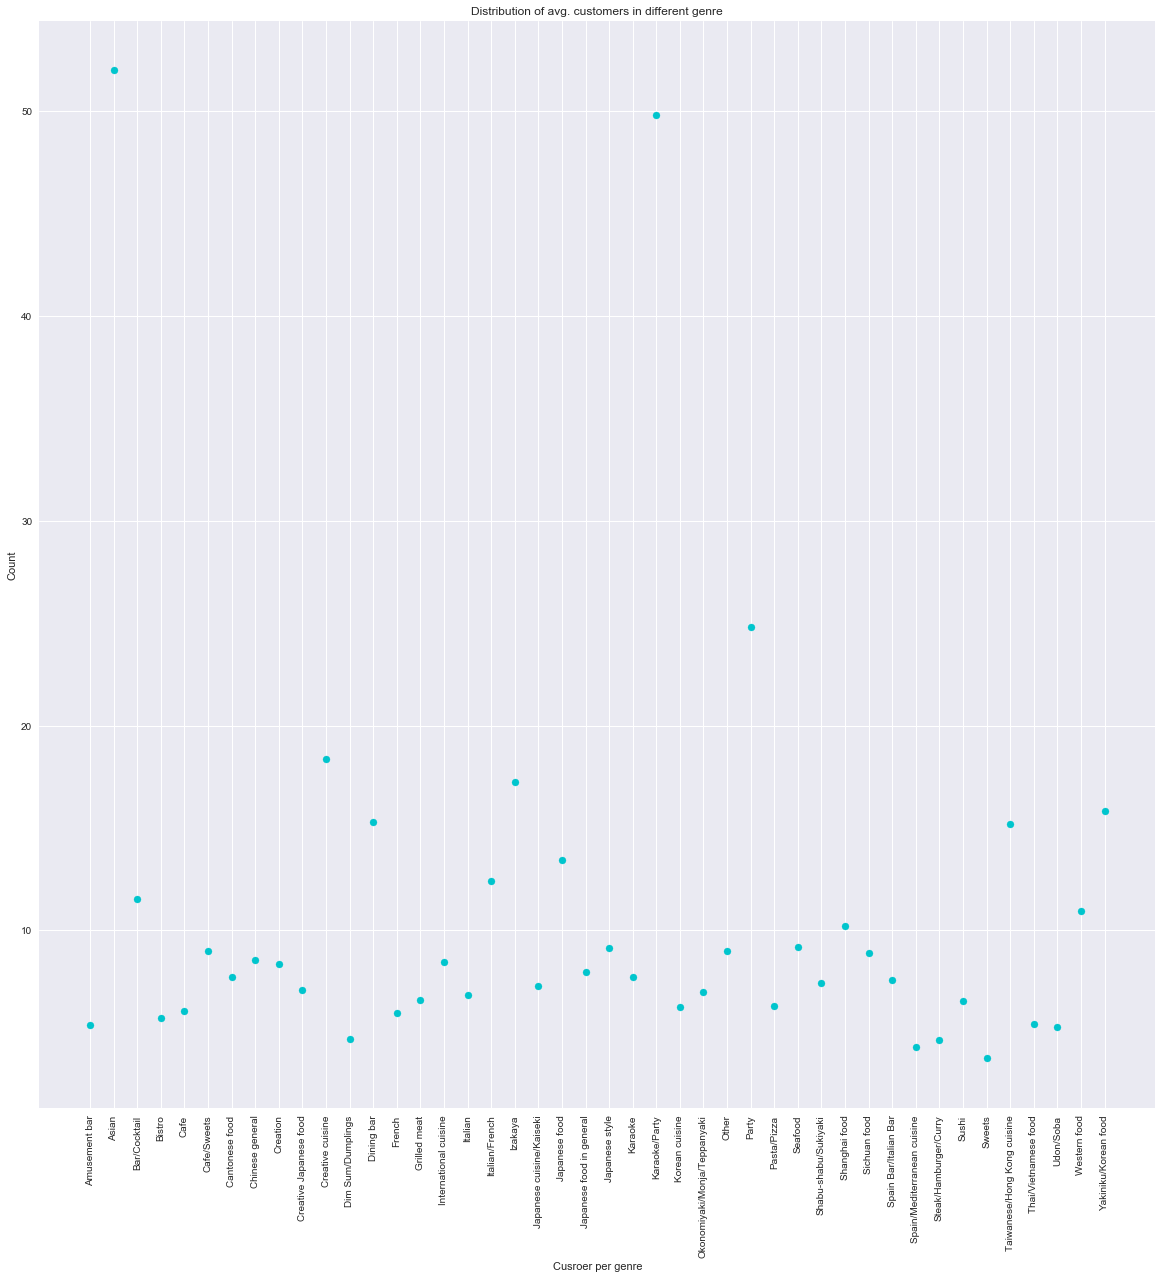

In [48]:
fig = plt.figure(figsize=(20, 20))  # create a figure object
u, indices = np.unique(data['genre'], return_index=True)
ax=plt.scatter(x=u,y=data.loc[indices,'genre_index'], color='#00C5CD')
plt.xlabel('Cusroer per genre')
plt.ylabel('Count')
plt.title('Distribution of avg. customers in different genre')
plt.xticks(rotation=90)
plt.show()
fig.savefig(os.path.join(output_data_path,'Customer_genre.png'))   # save the figure to file
plt.close(fig) 

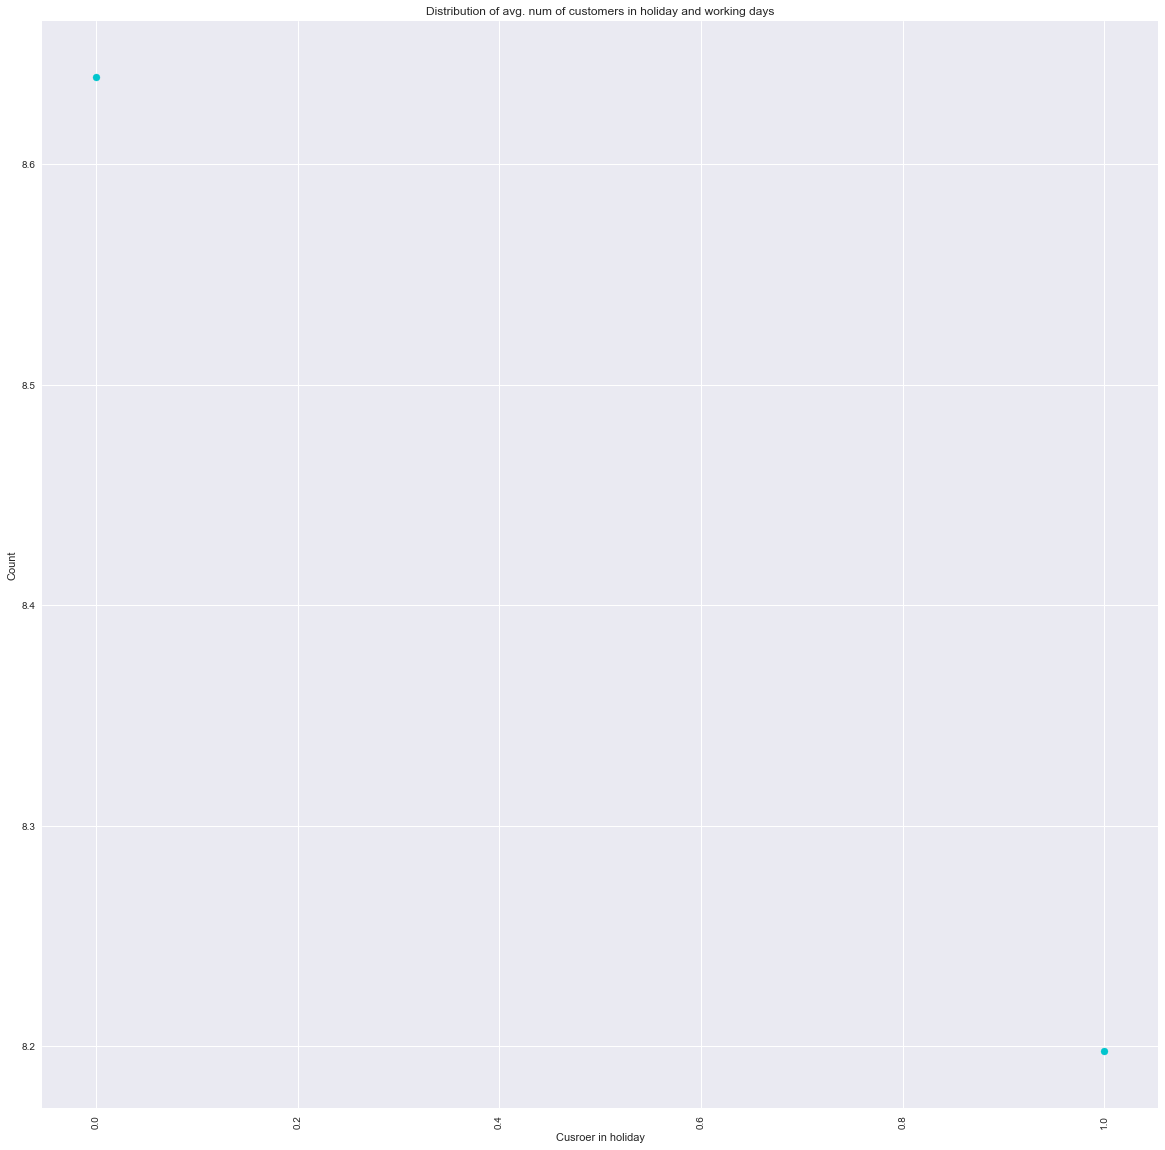

In [49]:
fig = plt.figure(figsize=(20, 20))  # create a figure object
u, indices = np.unique(data['holiday'], return_index=True)
ax=plt.scatter(x=u,y=data.loc[indices,'holiday_index'], color='#00C5CD')
plt.xlabel('Cusroer in holiday')
plt.ylabel('Count')
plt.title('Distribution of avg. num of customers in holiday and working days')
plt.xticks(rotation=90)
plt.show()
fig.savefig(os.path.join(output_data_path,'Customer_holiday.png'))   # save the figure to file
plt.close(fig) 

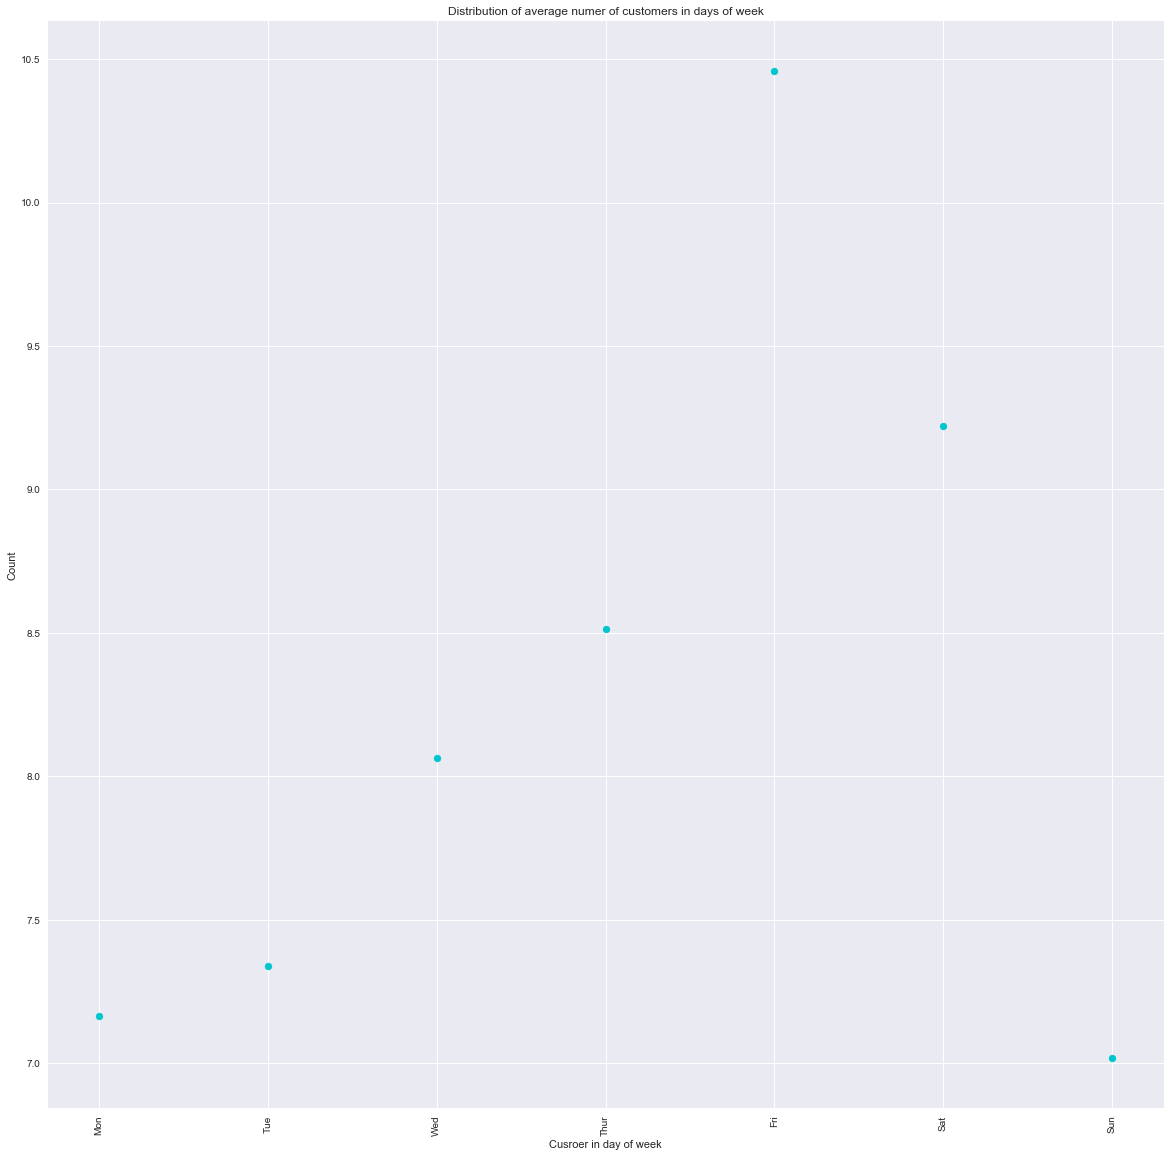

In [50]:
fig = plt.figure(figsize=(20, 20))  # create a figure object
u, indices = np.unique(data['day'], return_index=True)
ax=plt.scatter(x=u,y=data.loc[indices,'day_index'], color='#00C5CD')
plt.xlabel('Cusroer in day of week')
plt.ylabel('Count')
plt.title('Distribution of average numer of customers in days of week')
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun'),rotation=90)
plt.show()
fig.savefig(os.path.join(output_data_path,'Customer_day.png'))   # save the figure to file
plt.close(fig) 

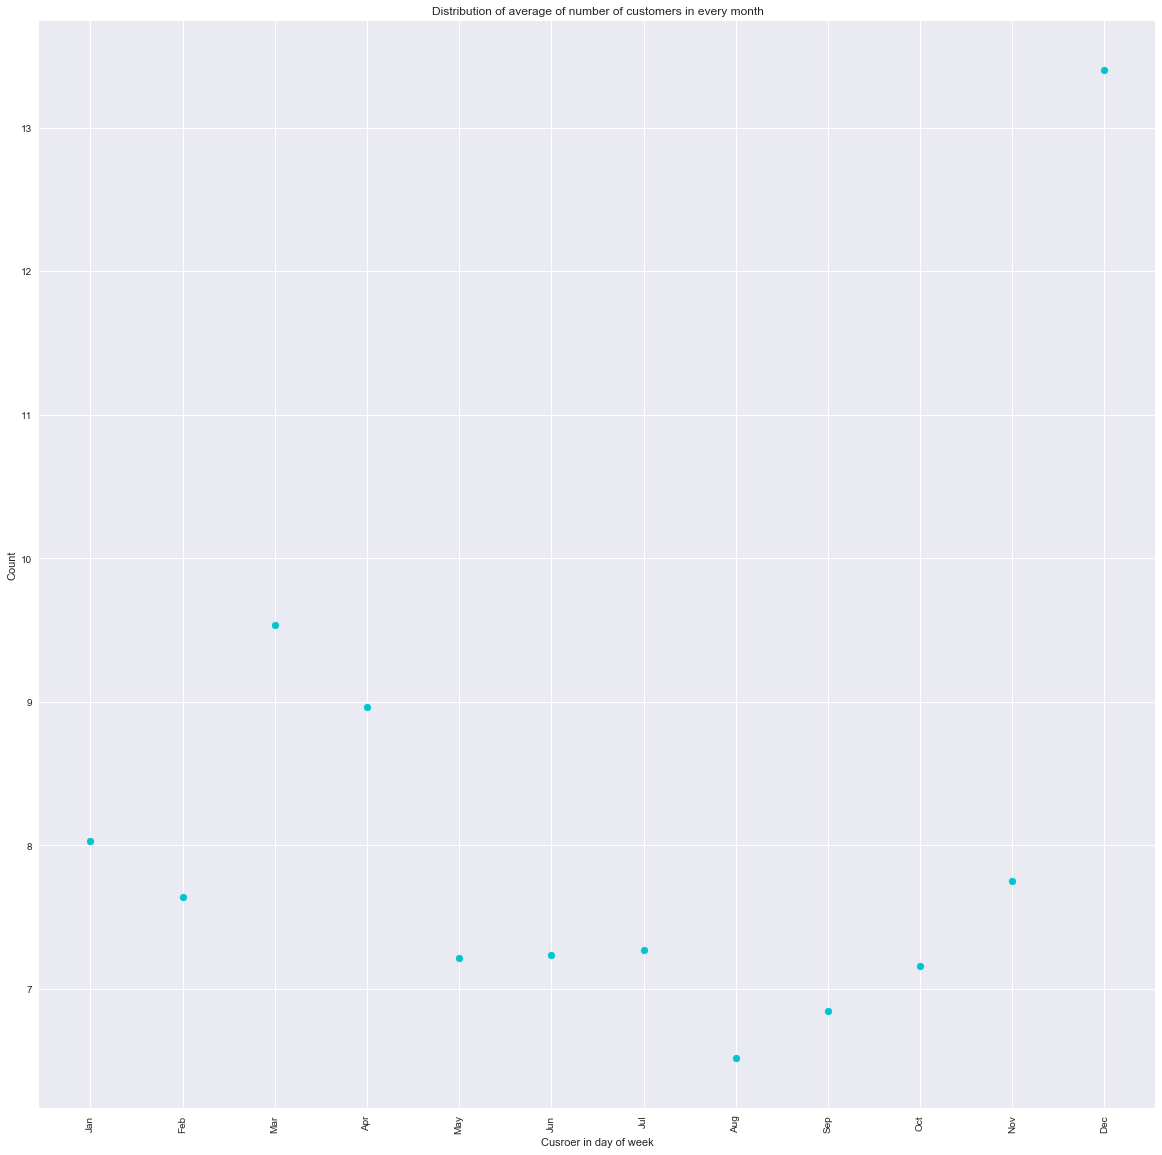

In [55]:
fig = plt.figure(figsize=(20, 20))  # create a figure object
u, indices = np.unique(data['month'], return_index=True)
ax=plt.scatter(x=u,y=data.loc[indices,'month_index'], color='#00C5CD')
plt.xlabel('Cusroer in day of week')
plt.ylabel('Count')
plt.title('Distribution of average of number of customers in every month')
plt.xticks(np.arange(12)+1, ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'),rotation=90)
plt.show()
fig.savefig(os.path.join(output_data_path,'Customer_month.png'))   # save the figure to file
plt.close(fig) 

In [ ]:
fig = plt.figure(figsize=(20, 20))  # create a figure object
ax=sns.jointplot(x='day_index',
               y='month_index',
               data=data,
               kind="kde",
               size=20, ratio=3,
               color='blue')
plt.title('Distribution of number of resrevation in week and month')
ax.ax_joint.set_xticks(np.arange(1,7,1))
ax.ax_joint.set_xticklabels(['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=0)
ax.ax_joint.set_yticks(np.arange(1,12,1))
ax.ax_joint.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.xlabel('Day of week ')
plt.ylabel('Month of year ')
plt.show()
fig.savefig(os.path.join(output_data_path,'Weekday_month_hist.png'))   # save the figure to file
plt.close(fig)    # close the figure